# Estratégia de Expansão de uma Loja de Roupas

Expansão empresarial é um momento em que várias empresas, idependente do seu tamanho, veem que seu crescimento chegou ao limite de acordo com os objetivos que foram estabelecidos na fase de planejamento estratégico. Uma expansão pode envolver a criação/oferta de novos produtos, abertura de filiais, adição de franqueados, participação em novos mercados, fusão ou aquisição com outras empresas.

Basicamente existem duas maneiras principais de uma empresa expandir seus negócios, de maneira orgânica ou inorgânica:
* Expansão orgânica: acontece quando a empresa busca crescer de modo mais lento, pode optar por: oferta de novos produtos, mais participação no mercado, participação em novos mercados ou desenvolvimento de novos canais de distribuição.
* Expansão inorgânica: acontece quando a empresa busca crescer de maneira mais rápida por meio de fusões e aquisições de novos negócios. Aqui o ponto crucial é analisar a sinergia, os objetivos e valores (tanto financeiros quanto morais) entre os negócios que serão fundidos/adquiridos.

A Le Lis é uma grande loja de roupas focada no público feminino de alto padrão sediada em [Baltimore, MD, EUA](https://www.google.com/maps/place/Baltimore,+MD,+EUA/@39.2848183,-76.6905368,12z/data=!3m1!4b1!4m5!3m4!1s0x89c803aed6f483b7:0x44896a84223e758!8m2!3d39.2903848!4d-76.6121893) que está buscando expandir seus rendimentos e a diretoria optou por fazer uma expansão orgânica. O grande diferencial é que a Le Lis presta um serviço de consultoria de moda na loja com estilistas que atendem de maneira individual cada cliente, além disso o cliente tem a opção de finalizar a compra das peças pelo site ou pelo aplicativo. A empresa está no impasse de onde deve focar seus investimentos em tecnologia: site ou aplicativo?

---

#### Os dados contidos nesta análise são fictícios e não condizem com a realidade, qualquer semelhança é mera coincidência!

---

Inicialmente será feita uma análise exporatória dos dados, depois um pré-processamento de acordo com a necessidade, categorização entre dados de treino e teste, treinamento do modelo, análise dos resultados e por fim as conclusões que podem ser obtidas deste dataset.

O dataset disponibilizado pela empresa contém 8 colunas e 500 linhas, contendo as seguintes informações:
* **Email**: informação de contato via e-mail;
* **Address**: endereço residencial informado pelo cliente;
* **Avatar**: cor escolhida para representar o usuário como seu avatar;
* **Avg. Session Length**: tempo médio que o cliente passa na loja;
* **Time on App**: tempo que o cliente utilizou o aplicativo;
* **Time on Website**: tempo que o cliente utilizou o site;
* **Length of Membership**: tempo em que o cliente está na loja, desde sua primeira compra;
* **Yearly Amount Spent**: quanto o cliente gastou ao longo de um ano.

In [1]:
#Importando as bibliotecas que serão utilizadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Definindo estilos e cores dos gráficos
sns.set_style('whitegrid')
sns.set_palette('rocket_r')

In [3]:
#Importando o arquivo de dataset
clients = pd.read_csv('Ecommerce Customers.csv')

## 1. Análise Exploratória dos Dados

In [4]:
#Como é a cara do dataset
clients.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
#Informações importantes de como os dados estão distribuídos no dataset
clients.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
#Indormações contidas no dataset em cada coluna
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Inicialmente podemos ver que não existem dados nulos no dataset e sua distribuição não apresenta grandes quantidades de pontos fora da curva, ou seja, outlyers. Para continuar a análise serão desenvolvidos gráficos de correlação entre as colunas **Time on App** e **Yearly Amount Spent**, e depois entre as colunas **Time on Website** e **Yearly Amount Spent** para ver se realmente faz sentido a *Le Lis* buscar investir em um destes pontos.

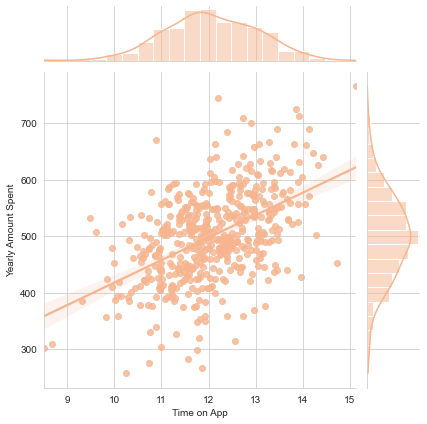

In [7]:
#Exibindo a relação entre Tempo no Aplicativo e Consumo no ano
sns.jointplot(kind='reg', data=clients, x='Time on App', y='Yearly Amount Spent')

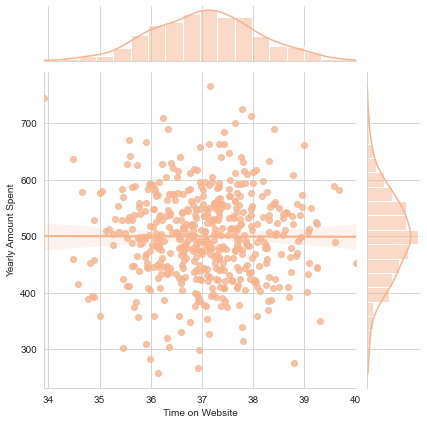

In [8]:
#Exibindo a relação entre Tempo no Site e Consumo no ano
sns.jointplot(kind='reg', data=clients, x='Time on Website', y='Yearly Amount Spent')

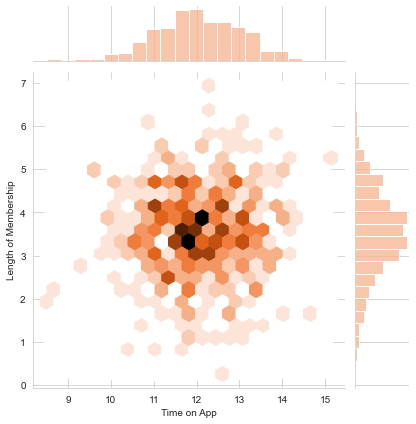

In [9]:
#Relação entre o tempo de uso do aplicativo e o tempo de associação do cliente
sns.jointplot(kind='hex', data=clients, x='Time on App', y='Length of Membership')

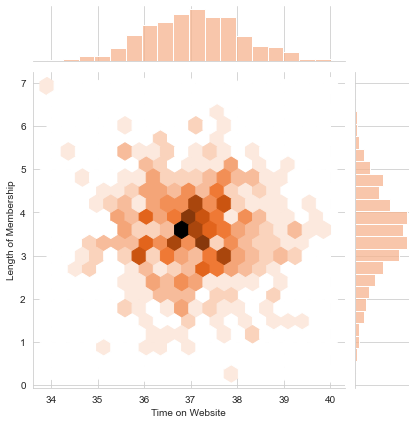

In [10]:
#Relação entre o tempo de uso do site e o tempo de associação do cliente
sns.jointplot(kind='hex', data=clients, x='Time on Website', y='Length of Membership')

Com estes gráficos gerados fica claro que o tempo de uso do aplicativo tem alguma relação com o consumo ao longo do ano. Já o tempo no site não apresenta uma relação significativa com o consumo ao longo do ano.

Outro ponto é que não há uma relação clara entre o tempo em que o cliente está associado a loja e o tempo que o cliente passa no aplicativo ou no site.

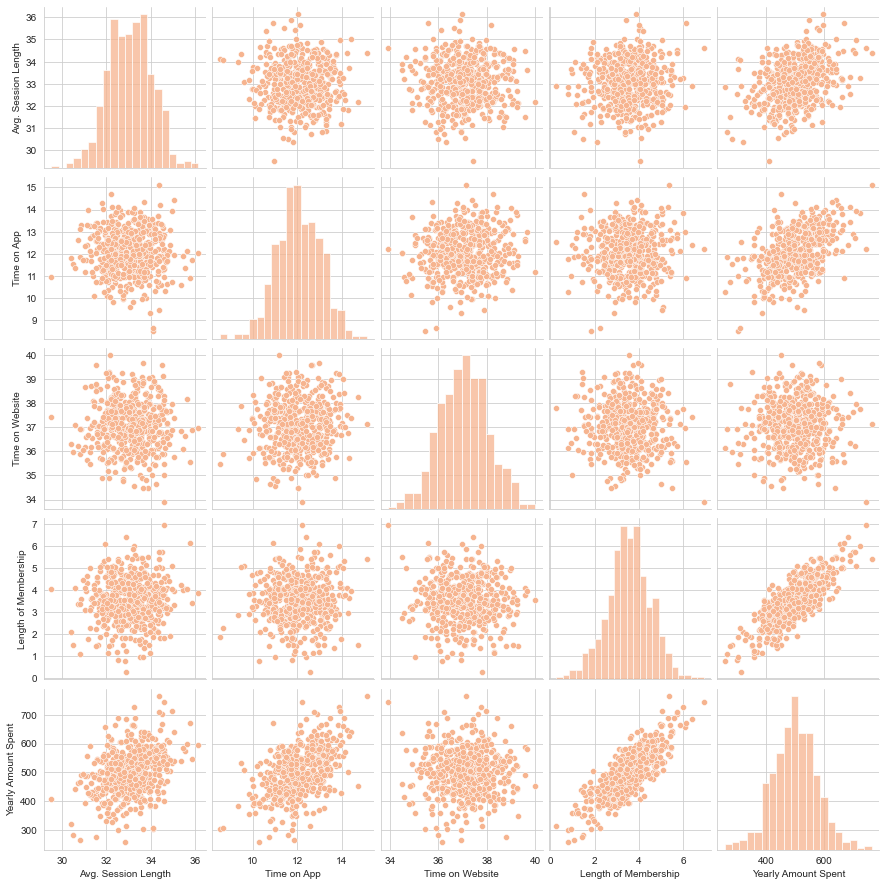

In [11]:
#Exibindo todas as correlações e como estão distribuídas
sns.pairplot(clients)

<AxesSubplot:>

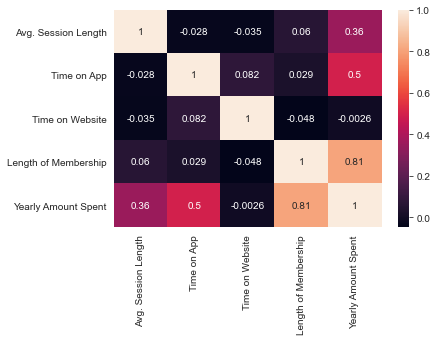

In [12]:
#Mapa de calor das correlações, onde quanto mais claro mais forte é a correlação
sns.heatmap(clients.corr(), annot=True)

Aqui o que interessa no momento são as informações dos plots relacionados com a coluna **Yearly Amount Spent**, nesta imagem estas relações se encontram na última linha ou coluna. Analisando cada plot preliminarmente entende-se que:
* **Yearly Amount Spent** e **Avg. Session Length**: a relação entre estas colunas é fraca;
* **Yearly Amount Spent** e **Time on App**: a relação entre estas colunas é forte;
* **Yearly Amount Spent** e **Time on Website**: a relação entre estas colunas não existe;
* **Yearly Amount Spent** e **Length of Membership**: a relação entre esta colunas é forte;

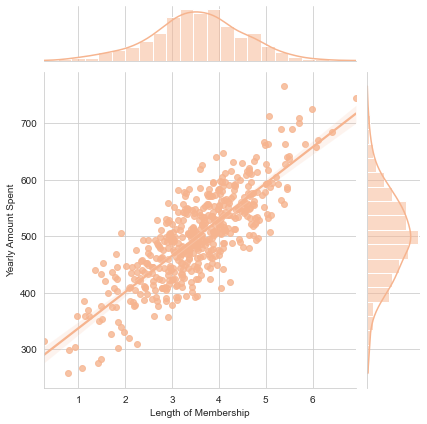

In [13]:
#Relação entre tempo de associação e consumo ao longo do ano
sns.jointplot(kind='reg', data=clients, x='Length of Membership', y='Yearly Amount Spent')

Um gráfico alternativo foi gerado para mostrar o quanto o consumo ao longo do ano está relacionado com o tempo de associação do cliente, visto que esta não é uma área pretendida para investimentos, mas influencia fortemente o consumo no ano.

Para que a *Le Lis* possa continuar obtendo estas informações de forma rápida um modelo de Machine Learning será criado baseado em Regressão Linear, pois esta se mostrou efetiva para analisar os dados da empresa.

## 2. Criação do Modelo de Machine Learning

A partir deste ponto será tratado a criação do modelo e seus processos relacionados, serão feitas as divisões entre dados de teste e treino, dados explicativos e dados a serem preditos, treino do modelo e por fim a análise sobre a efetividade do mesmo.

In [14]:
#Visualizando as colunas do dataset
clients.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Para um este modelo o que interessa são as colunas de dados quantitativos, logo as colunas **Email**, **Address** e **Avatar** não serão utilizadas. O que queremos prever aqui é quanto um cliente consome ao longo do ano, então a variável a ser predita será a coluna **Yearly Amount Spent**, as demais colunas serão as variáveis explicativas que servirão de base para o modelo criar as previsões.

In [15]:
#Dividindo as colunas entre explicativas e preditivas
X = clients[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = clients['Yearly Amount Spent']

In [17]:
#Importando o método para dividir os dados entre teste e treino
from sklearn.model_selection import train_test_split

In [18]:
#Criando as variáveis que receberão os dados de teste e treino da divisão feita anteriormente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100)

In [19]:
#Importando o modelo de regressão linear
from sklearn.linear_model import LinearRegression

In [20]:
#Criando variável para receber o modelo
lm = LinearRegression()

In [21]:
#Treinando o modelo
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
coeficientes = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficientes'])
coeficientes

,Coeficientes
Avg. Session Length,26.155324
Time on App,38.620085
Time on Website,0.317603
Length of Membership,61.820394


Estes coeficientes informam que quando determinada coluna tiver o acréscimo de 1 unidade o consumo ao longo do ano aumentará no valor informado pelo coeficiente. Por exemplo, se o cliente aumentar o tempo de uso do aplicativo em 1 minuto seu consumo anual subirá em 38,62 dólares.

In [23]:
#Variável com os valores previstos pelo modelo
preds = lm.predict(X_test)

## 2.1 Avaliando o Modelo

Existem várias maneiras de se avaliar um modelo, aqui serão usadas 2 maneiras:
1. plotar um gráfico de pontos entre os valores previstos e os valores reais, quanto mais próximo de uma reta este gráfico estiver melhor é a precisão do modelo;
2. plotar um gráfico de distribuição dos erros que o modelo cometeu, calculando a diferença entre os dados reais e os previstos, quanto mais próximo de uma curva normal melhor é a precisão do modelo.

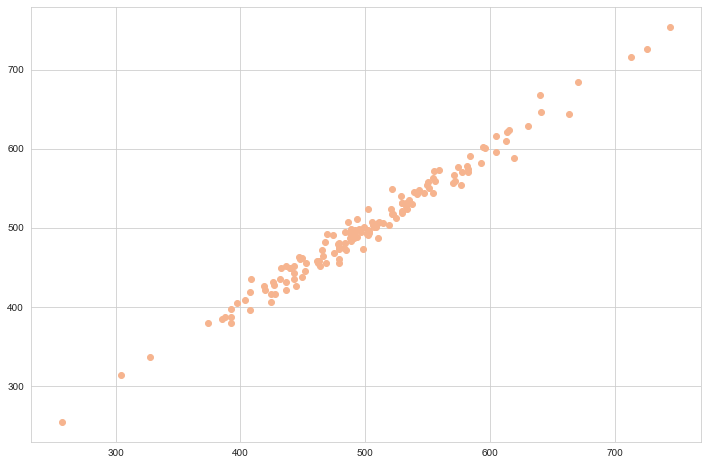

In [24]:
#Plotanto o primeiro gráfico entre os dados previstos e reais
plt.figure(figsize=(12, 8))
plt.scatter(y_test, preds)

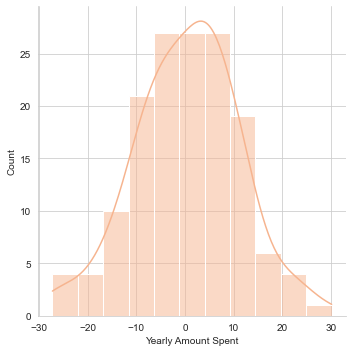

In [25]:
#Plotanto o segundo gráfico de distribuição dos erros, diferenças entre valores reais e previstos
sns.displot((y_test-preds), kde=True)

In [26]:
#Importando o método metrics
from sklearn import metrics

In [28]:
#Calculando alnguns erros para comparação entre modelos
print('MAE: ',metrics.mean_absolute_error(y_test, preds),
     '\nMSE: ',metrics.mean_squared_error(y_test, preds),
     '\nRMSE: ',np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE:  8.511790290965859 
MSE:  114.37618082343693 
RMSE:  10.69468002435963


## 3. Conclusão

Ao longo desta análise evidenciou-se que um ponto mais relevante para o cliente consumir mais ao longo do ano é sua fidelização, visto que quanto mais tempo um cliente está associado a loja maiores são seus valores de consumo. Esta é uma informação que pode ser analisada com mais atenção.

Levando em consideração que foi feito a pergunta de se investir no aplicativo ou no site, o melhor é investir no aplicativo, o site não apresenta uma relação com o aumento do consumo ao longo do ano pelo cliente.